<a href="https://colab.research.google.com/github/taesamja/2020bmt_AI_python/blob/master/pinkwink_datascience_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 사이언스 스쿨
- https://datascienceschool.net/intro.html


## Colab 한글설정

In [ ]:
# Colab에서 한글 사용
# 참고사이트 : https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 이후 런타임-런타임 다시 시작을 클릭하여 런타임을 재시작합니다.

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

# 신종 코로나 바이러스 COVID-19 데이터 분석

In [2]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data.head()

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state
0,1.0,China,filtered at airport,NaN,visit to Wuhan,NaN,45.0,2020-01-20,NaN,released
1,2.0,Korea,filtered at airport,NaN,visit to Wuhan,NaN,75.0,2020-01-24,NaN,released
2,3.0,Korea,capital area,NaN,visit to Wuhan,NaN,16.0,2020-01-26,NaN,released
3,4.0,Korea,capital area,NaN,visit to Wuhan,NaN,95.0,2020-01-27,NaN,released
4,5.0,Korea,capital area,NaN,visit to Wuhan,NaN,31.0,2020-01-30,NaN,released


In [3]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['country'].unique()

array(['China', 'Korea', nan, 'Mongolia'], dtype=object)

In [4]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['country'].value_counts()

Korea       6274
China          8
Mongolia       1
Name: country, dtype: int64

In [5]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data[raw_data['country'] == 'China']

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state
0,1.0,China,filtered at airport,NaN,visit to Wuhan,NaN,45.0,2020-01-20,NaN,released
11,12.0,China,capital area,NaN,contact with patient in Japan,NaN,422.0,2020-02-01,NaN,released
13,14.0,China,capital area,NaN,contact with patient,12.0,3.0,2020-02-02,NaN,released
22,23.0,China,capital area,NaN,visit to Wuhan,NaN,23.0,2020-02-06,NaN,released
26,27.0,China,capital area,NaN,visit to China,NaN,40.0,2020-02-09,NaN,isolated
27,28.0,China,capital area,NaN,contact with patient,3.0,1.0,2020-02-10,NaN,released
754,755.0,China,capital area,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-24,NaN,isolated
923,924.0,China,capital area,NaN,visit to China,NaN,NaN,2020-02-25,NaN,isolated


In [6]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data[raw_data['infected_by'] == 12]

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state
13,14.0,China,capital area,NaN,contact with patient,12.0,3.0,2020-02-02,NaN,released


In [7]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data[raw_data['infected_by'] == 1]

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state


In [8]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']
trends.head()

,id,infected_by,contact_number,counts,deceased
confirmed_date,,,,,
2020-01-20,1.0,0.0,45.0,1,NaN
2020-01-24,2.0,0.0,75.0,1,NaN
2020-01-26,3.0,0.0,16.0,1,NaN
2020-01-27,4.0,0.0,95.0,1,NaN
2020-01-30,18.0,3.0,57.0,3,NaN


In [9]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]
trends.tail()

,counts,deceased,contact_number
confirmed_date,,,
2020-03-01,1062,3.0,23.0
2020-03-02,600,3.0,0.0
2020-03-03,516,1.0,0.0
2020-03-04,438,3.0,0.0
2020-03-05,519,NaN,0.0


In [10]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()
trends.tail()

,counts,deceased,contact_number,total_counts
confirmed_date,,,,
2020-03-01,1062,3.0,23.0,4211
2020-03-02,600,3.0,0.0,4811
2020-03-03,516,1.0,0.0,5327
2020-03-04,438,3.0,0.0,5765
2020-03-05,519,NaN,0.0,6284


In [11]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()
trends.tail()

,counts,deceased,contact_number,total_counts,decease_ratio
confirmed_date,,,,,
2020-03-01,1062,3.0,23.0,4211,0.003800
2020-03-02,600,3.0,0.0,4811,0.003949
2020-03-03,516,1.0,0.0,5327,0.003754
2020-03-04,438,3.0,0.0,5765,0.003990
2020-03-05,519,NaN,0.0,6284,NaN


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


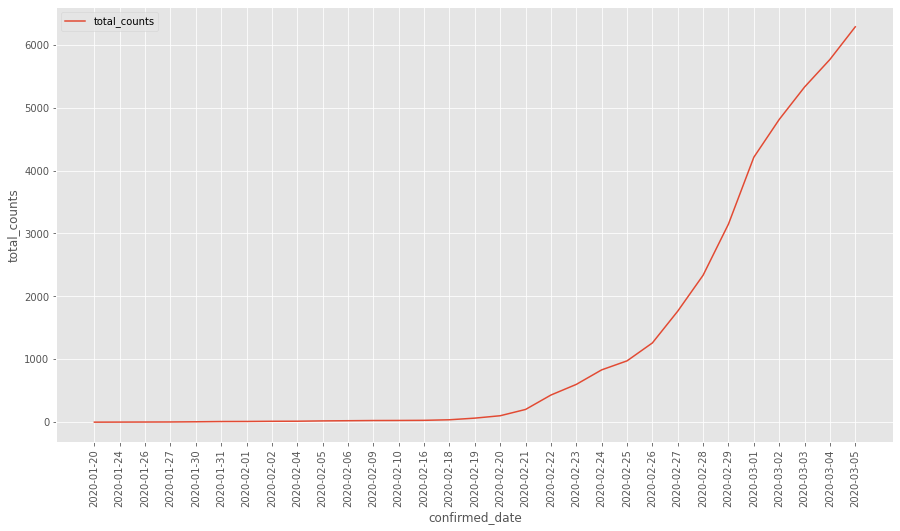

In [12]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date', y='total_counts', label='total_counts', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

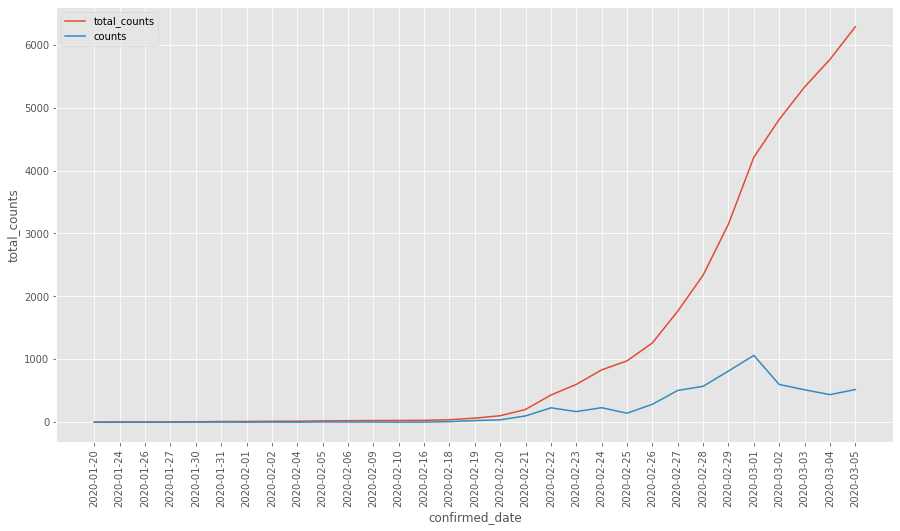

In [13]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date', y='total_counts', label='total_counts', data=trends)
sns.lineplot(x='confirmed_date', y='counts', label='counts', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

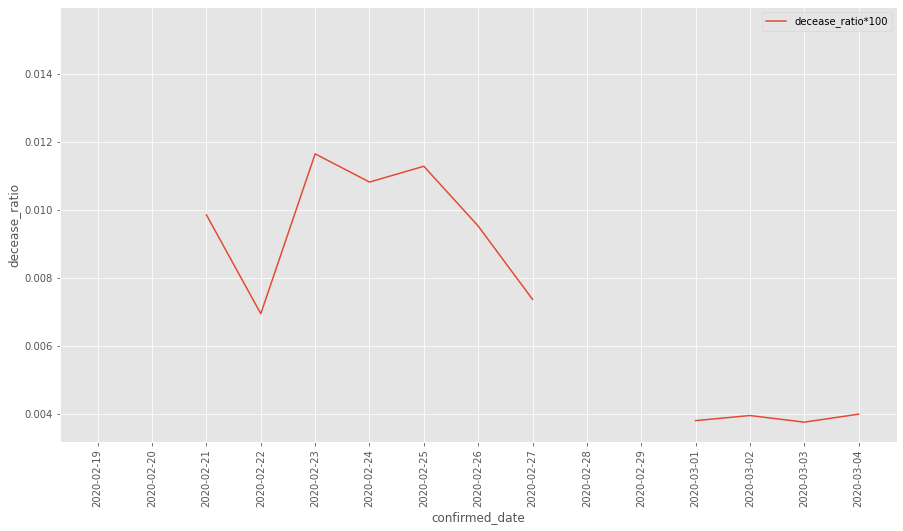

In [14]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date', y='decease_ratio', label='decease_ratio*100', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

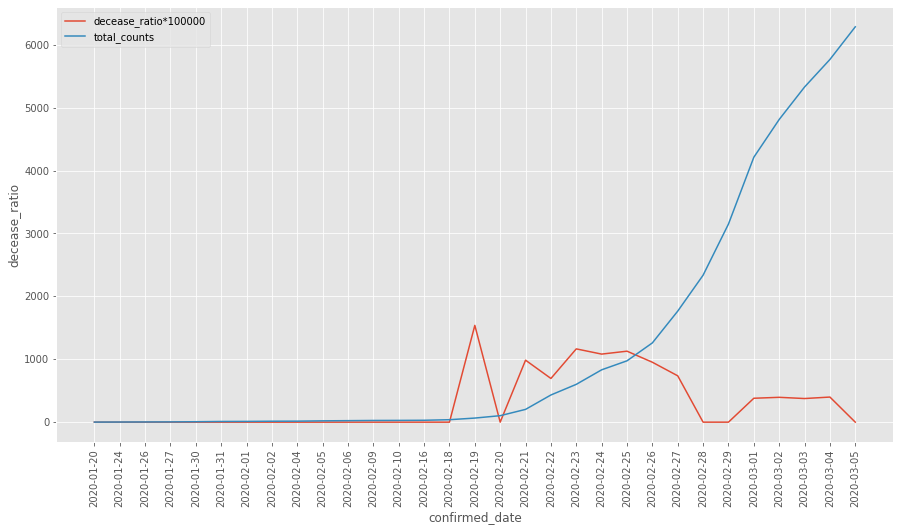

In [15]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date', y='decease_ratio', label='decease_ratio*100000', data=trends)
sns.lineplot(x='confirmed_date', y='total_counts', label='total_counts', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

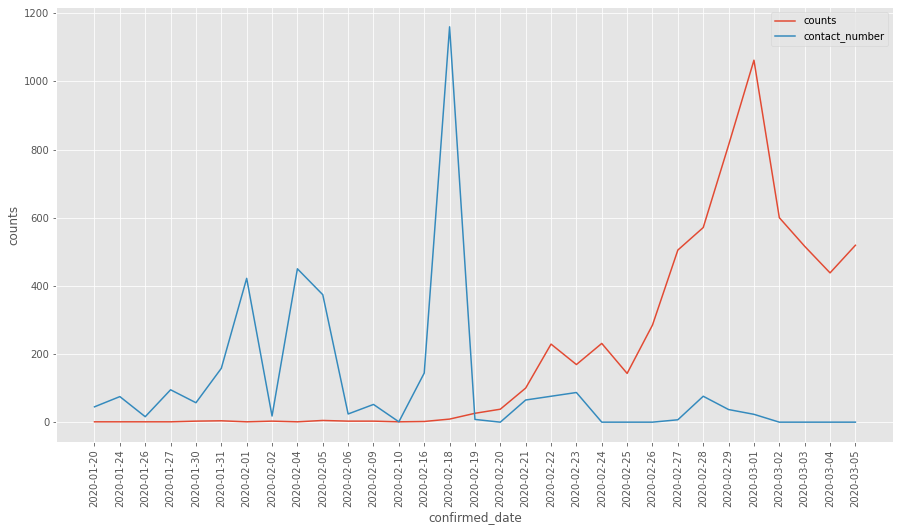

In [16]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(x='confirmed_date', y='counts', label='counts', data=trends)
sns.lineplot(x='confirmed_date', y='contact_number', label='contact_number', data=trends)
plt.xticks(rotation=90)
plt.legend()
plt.show()

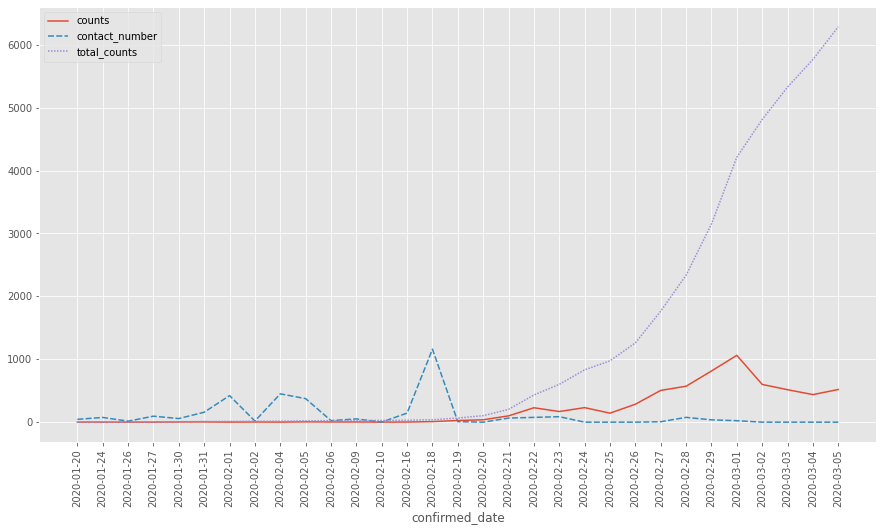

In [17]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

raw_data[raw_data['confirmed_date'] == '2020-02-18']

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.lineplot(data=trends[['counts', 'contact_number', 'total_counts']])
plt.xticks(rotation=90)
plt.show()

In [18]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']
tmp_date = raw_data.groupby(['confirmed_date', 'region'])[target_cols].sum()
tmp_date.head()

,,counts,contact_number
confirmed_date,region,,
2020-01-20,filtered at airport,1,45.0
2020-01-24,filtered at airport,1,75.0
2020-01-26,capital area,1,16.0
2020-01-27,capital area,1,95.0
2020-01-30,capital area,3,57.0


In [19]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']
tmp_date = tmp_date.reset_index()
tmp_date['size'] = tmp_date['counts']*1000
tmp_date['Date'] = pd.to_datetime(tmp_date['confirmed_date'])
tmp_date['Date'] = tmp_date['Date'].dt.strftime('%Y-%m-%d')
tmp_date.head()


,confirmed_date,region,counts,contact_number,size,Date
0,2020-01-20,filtered at airport,1,45.0,1000,2020-01-20
1,2020-01-24,filtered at airport,1,75.0,1000,2020-01-24
2,2020-01-26,capital area,1,16.0,1000,2020-01-26
3,2020-01-27,capital area,1,95.0,1000,2020-01-27
4,2020-01-30,capital area,3,57.0,3000,2020-01-30


In [20]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']
tmp_date = tmp_date.reset_index()
tmp_date['size'] = tmp_date['counts']*1000
tmp_date['Date'] = pd.to_datetime(tmp_date['confirmed_date'])
tmp_date['Date'] = tmp_date['Date'].dt.strftime('%Y-%m-%d')

raw_data['region'].unique()

array(['filtered at airport', 'capital area', 'Jeollabuk-do', 'Gwangju',
       'Daegu', 'Gyeongsangbuk-do', nan, 'Jeju-do', 'Busan', 'Daejeon',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Ulsan', 'Gangwon-do',
       'Jeollanam-do'], dtype=object)

In [21]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

tmp_date.head()

,index,confirmed_date,region,counts,contact_number,size,Date,Lat,Long
0,0,2020-01-20,filtered at airport,1,45.0,1000,2020-01-20,37.459998,126.440726
1,1,2020-01-24,filtered at airport,1,75.0,1000,2020-01-24,37.459998,126.440726
2,2,2020-01-26,capital area,1,16.0,1000,2020-01-26,37.497496,126.973749
3,3,2020-01-27,capital area,1,95.0,1000,2020-01-27,37.497496,126.973749
4,4,2020-01-30,capital area,3,57.0,3000,2020-01-30,37.497496,126.973749


In [22]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

import plotly.express as px

fig = px.scatter_geo(tmp_date, lat='Lat', lon='Long', scope='asia',
                     color='size', size='size', hover_name='region',
                     hover_data=['counts', 'contact_number'],
                     projection='natural earth', animation_frame='Date',
                     title='Korea')

fig.update(layout_coloraxis_showscale=False)

fig.show()

In [23]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

raw_data['infection_reason'].unique()

array(['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', nan, 'visit to Daegu', 'pilgrimage to Israel',
       'visit to Vietnam', ' visit to China',
       'visit to Cheongdo Daenam Hospital', 'visit to Shincheonji Church',
       'visit to Japan', 'visit to Italy'], dtype=object)

In [24]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

raw_data['infection_reason'].value_counts()

contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
contact with patient in Singapore     2
visit to Thailand                     2
visit to Shincheonji Church           1
visit to Japan                        1
visit to Vietnam                      1
visit to Cheongdo Daenam Hospital     1
visit to Italy                        1
 visit to China                       1
visit to China                        1
contact with patient in Japan         1
Name: infection_reason, dtype: int64

In [25]:
raw_data[raw_data['infection_reason'] == 'visit to Wuhan']

,id,country,region,group,infection_reason,infected_by,contact_number,confirmed_date,deceased_date,state,counts
0,1.0,China,filtered at airport,NaN,visit to Wuhan,NaN,45.0,2020-01-20,NaN,released,1
1,2.0,Korea,filtered at airport,NaN,visit to Wuhan,NaN,75.0,2020-01-24,NaN,released,1
2,3.0,Korea,capital area,NaN,visit to Wuhan,NaN,16.0,2020-01-26,NaN,released,1
3,4.0,Korea,capital area,NaN,visit to Wuhan,NaN,95.0,2020-01-27,NaN,released,1
4,5.0,Korea,capital area,NaN,visit to Wuhan,NaN,31.0,2020-01-30,NaN,released,1
6,7.0,Korea,capital area,NaN,visit to Wuhan,NaN,9.0,2020-01-30,NaN,released,1
7,8.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,NaN,113.0,2020-01-31,NaN,released,1
22,23.0,China,capital area,NaN,visit to Wuhan,NaN,23.0,2020-02-06,NaN,released,1


In [26]:
raw_data[raw_data['infection_reason'] == 'visit to Daegu']['group'].value_counts()

Shincheonji Church    21
Name: group, dtype: int64

In [27]:
raw_data[raw_data['infection_reason'] == 'contact with patient']['group'].value_counts()

Shincheonji Church               8
Eunpyeong St. Mary's Hospital    5
Name: group, dtype: int64

In [28]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000

target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

tmp = tmp_date.groupby(['confirmed_date', 'region'])[['counts']].sum()
tmp = tmp.groupby('region').cumsum()
tmp.reset_index(inplace=True)
tmp.head()

,confirmed_date,region,counts
0,2020-01-20,filtered at airport,1
1,2020-01-24,filtered at airport,2
2,2020-01-26,capital area,1
3,2020-01-27,capital area,2
4,2020-01-30,capital area,5


In [29]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/patient.csv'

raw_data = pd.read_csv(filename, usecols=[0,3,4,5,6,8,9,10,12,13])

raw_data['counts'] = 1
trends = raw_data.groupby('confirmed_date').sum()
trends['deceased'] = raw_data.groupby('deceased_date').sum()['counts']

trends = trends[['counts', 'deceased', 'contact_number']]

trends['total_counts'] = trends['counts'].cumsum()

trends['decease_ratio'] = trends['deceased'].cumsum() / trends['counts'].cumsum()

trends['decease_ratio'] = trends['decease_ratio'].fillna(0) * 100000


target_cols = ['counts', 'contact_number']

lat_lon_values = {
    'filtered at airport' : [37.459998, 126.440726],
    'capital area' : [37.497496, 126.973749], 
    'Jeollabuk-do' : [35.855575, 127.094483], 
    'Gwangju' : [35.152262, 126.830752],
    'Daegu' : [35.847454, 128.561548], 
    'Gyeongsangbuk-do' : [35.808724, 128.784309],
    'Jeju-do' : [33.378157, 126.539397],  
    'Busan' : [35.175847, 129.076522], 
    'Daejeon' : [36.334188, 127.393948],
    'Chungcheongbuk-do' : [36.772820, 127.751845], 
    'Chungcheongnam-do' : [36.506231, 127.064230], 
    'Ulsan' : [35.506991, 129.327465], 
    'Gangwon-do' : [37.730627, 128.044376],
    'Jeollanam-do' : [34.815935, 126.453504]
}

tmp_date['Lat'] = [lat_lon_values[each][0] for each in tmp_date['region']]
tmp_date['Long'] = [lat_lon_values[each][1] for each in tmp_date['region']]

tmp = tmp_date.groupby(['confirmed_date', 'region'])[['counts']].sum()
tmp = tmp.groupby('region').cumsum()
tmp.reset_index(inplace=True)

import plotly.express as px

fig = px.bar(tmp, x='confirmed_date', y='counts', color='region', orientation='v', height=500, title='Confirmed.', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.show()

# 서울 시민들이 운동을 하지 않는 이유에 대한 분석
- 서울 열린데이터 과장
- https://data.seoul.go.kr/dataList/10280/C/2/datasetView.do

In [30]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [31]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 53 non-null     int64  
 1   대분류                53 non-null     object 
 2   분류                 53 non-null     object 
 3   운동을 할 충분한 시간이 없어서  53 non-null     float64
 4   함께 운동을 할 사람이 없어서   53 non-null     object 
 5   운동을 할 만한 장소가 없어서   53 non-null     float64
 6   운동을 싫어해서           53 non-null     float64
 7   기타                 53 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.4+ KB


In [32]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


In [33]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)
raw_data.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [34]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']
raw_data

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


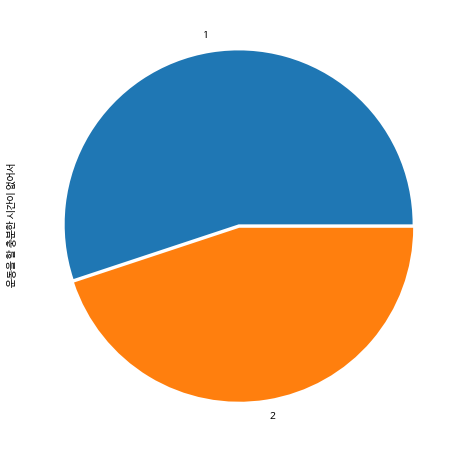

In [1]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(10, 8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

In [36]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)
raw_data.head()

,대분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,,
남자,성별,55.2,7.9,5.5,29.8,1.6
여자,성별,45.0,8.3,6.0,38.8,1.8


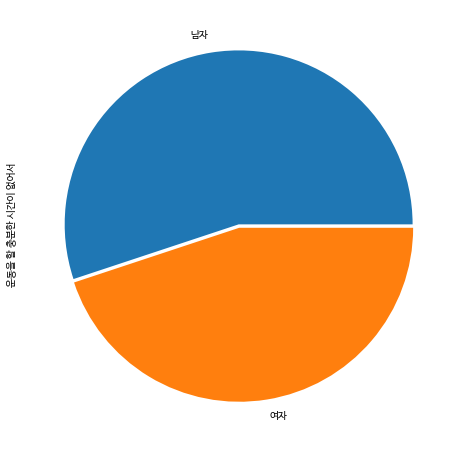

In [2]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)
raw_data.head()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(10, 8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

TypeError: ignored

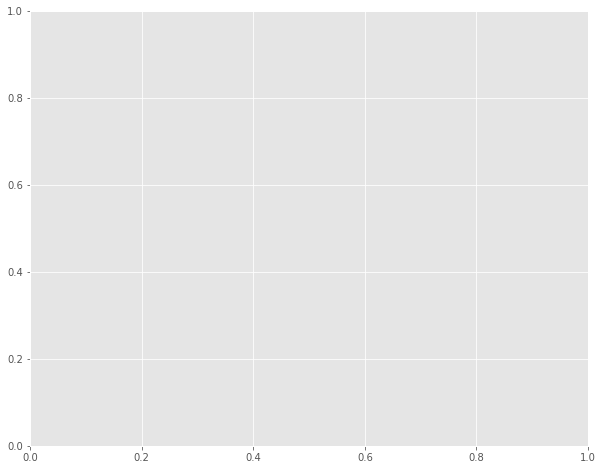

In [38]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(10, 8))
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

# 이유 : 해당 컬럼이 숫자가 아니라서 생긴 문제

In [3]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)

raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 남자 to 여자
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   대분류                2 non-null      object 
 1   운동을 할 충분한 시간이 없어서  2 non-null      float64
 2   함께 운동을 할 사람이 없어서   2 non-null      float64
 3   운동을 할 만한 장소가 없어서   2 non-null      float64
 4   운동을 싫어해서           2 non-null      float64
 5   기타                 2 non-null      object 
dtypes: float64(4), object(2)
memory usage: 112.0+ bytes


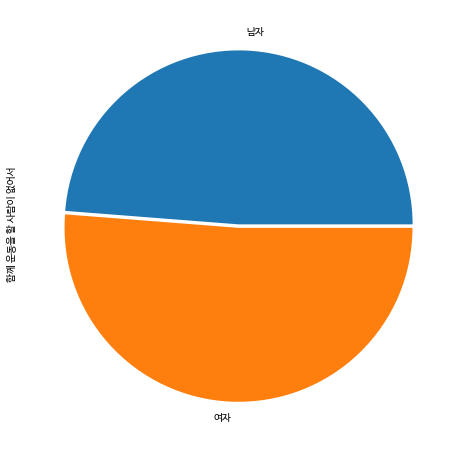

In [4]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)

raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(10, 8))
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

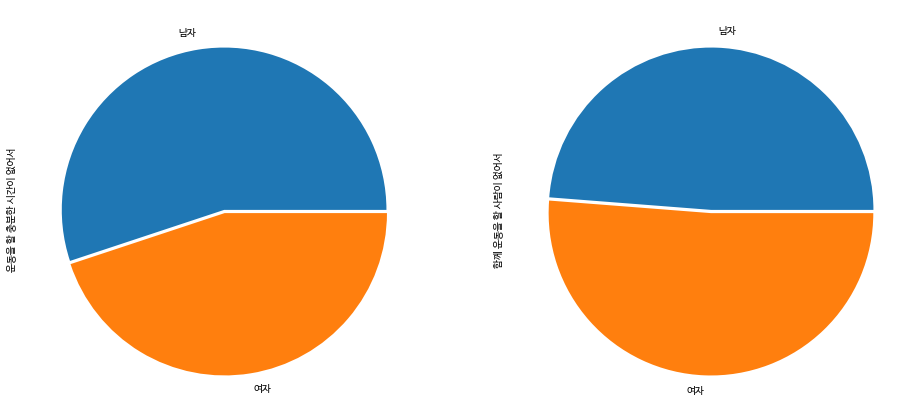

In [5]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)

raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0])
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1])

plt.show()

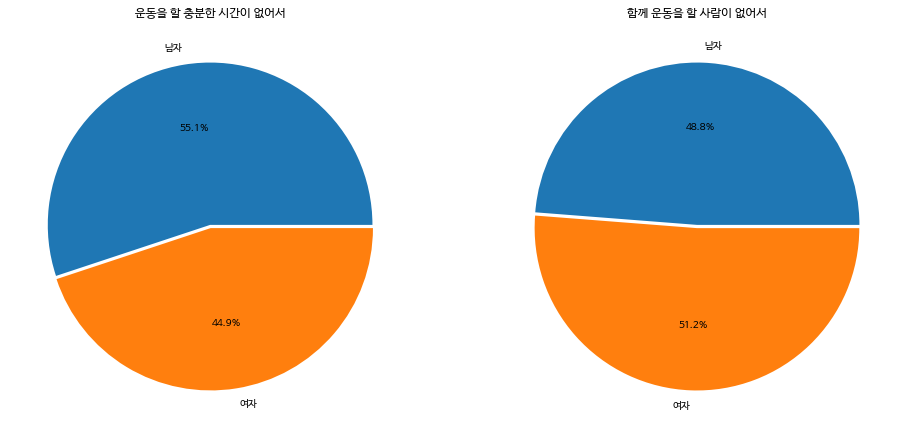

In [6]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report.txt'

raw_data = pd.read_csv(filename, sep='\t')

raw_data[raw_data['대분류'] == '성별']

raw_data.drop(['기간'], axis='columns', inplace=True)

raw_data = raw_data[raw_data['대분류'] == '성별']

raw_data.set_index('분류', inplace=True)

raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

plt.show()

# 서울시 흡연률 데이터에서 연령별 흡연률 데이터 시각화

In [7]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data.head()

,기간,구분,구분.1,전체,남자,여자
0,2017,서울시,서울시,18.8,35.1,3.3
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [8]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      39 non-null     int64  
 1   구분      39 non-null     object 
 2   구분.1    39 non-null     object 
 3   전체      39 non-null     float64
 4   남자      39 non-null     float64
 5   여자      39 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [9]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data['구분'].unique()

array(['서울시', '생애주기별', '교육수준별Ⅰ(30~64세)', '교육수준별Ⅱ(65세 이상)', '직업별(30~64세)',
       '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [10]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data['구분.1'].unique()

array(['서울시', '19~29세', '30~44세', '45~64세', '65세 이상', '중졸이하', '고졸',
       '대졸이상', '초졸이하', '중졸', '고졸이상', '육체직', '서비스ㆍ판매직', '사무직', '종로구', '중구',
       '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [11]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data[raw_data['구분'] == '생애주기별']

,기간,구분,구분.1,전체,남자,여자
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [12]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')
raw_data[raw_data['구분'] == '생애주기별'][['구분.1','전체','남자','여자']]

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


In [13]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')

smoke_age = raw_data[raw_data['구분']=='생애주기별'][['구분.1','전체','남자','여자']]
smoke_age

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


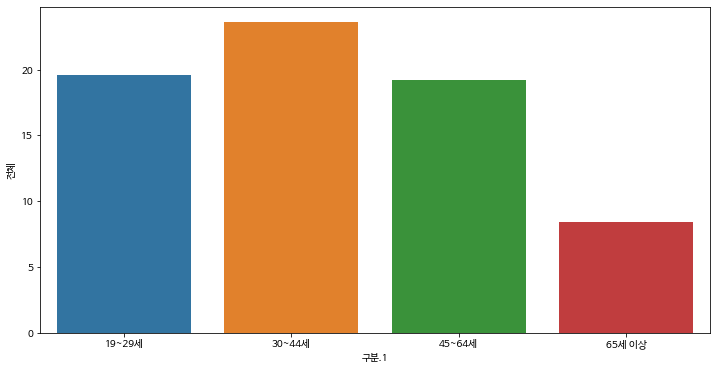

In [14]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')

smoke_age = raw_data[raw_data['구분']=='생애주기별'][['구분.1','전체','남자','여자']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(12, 6))

sns.barplot(x='구분.1', y='전체', data=smoke_age)

plt.show()

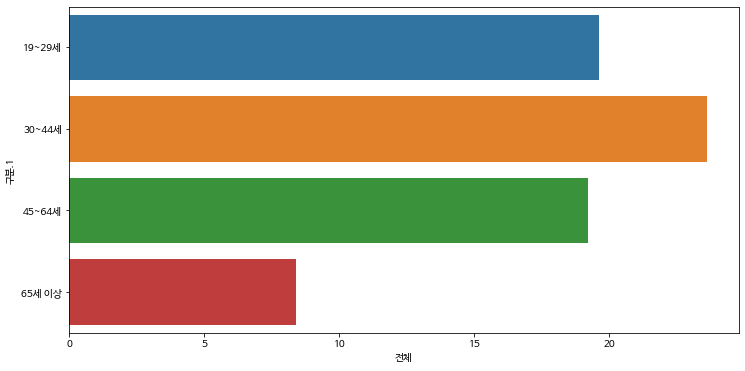

In [15]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')

smoke_age = raw_data[raw_data['구분']=='생애주기별'][['구분.1','전체','남자','여자']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.figure(figsize=(12, 6))

sns.barplot(y='구분.1', x='전체', data=smoke_age)

plt.show()

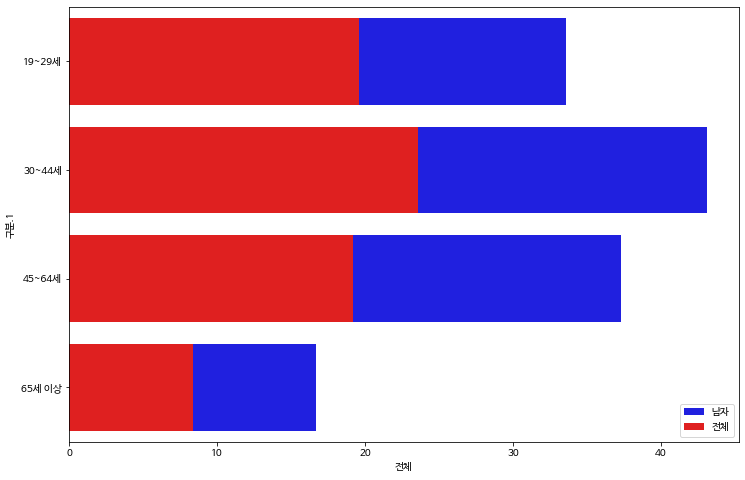

In [22]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')

smoke_age = raw_data[raw_data['구분']=='생애주기별'][['구분.1','전체','남자','여자']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

f, ax = plt.subplots(figsize = (12,8))

sns.barplot(x='남자', y='구분.1', data=smoke_age, color='b', label='남자')
sns.barplot(x='전체', y='구분.1', data=smoke_age, color='r', label='전체')
plt.legend(loc='lower right')

plt.show()

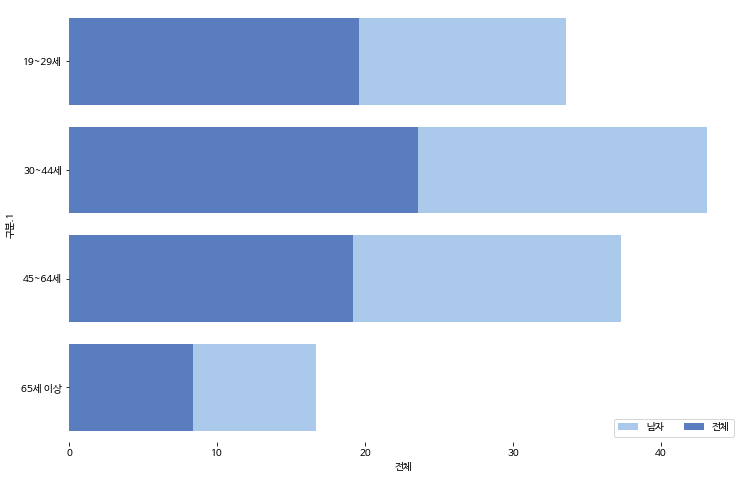

In [25]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-2.txt'

raw_data = pd.read_csv(filename, sep='\t')

smoke_age = raw_data[raw_data['구분']=='생애주기별'][['구분.1','전체','남자','여자']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

f, ax = plt.subplots(figsize = (12,8))

sns.set_color_codes('pastel')
sns.barplot(x='남자', y='구분.1', data=smoke_age, color='b', label='남자')

sns.set_color_codes('muted')
sns.barplot(x='전체', y='구분.1', data=smoke_age, color='b', label='전체')

ax.legend(ncol=2, loc='lower right')
sns.despine(left=True, bottom=True)

plt.show()

# 서울시 인구현황 데이터 시각화하기

In [26]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.1/4,합계,"4,354,006","10,013,781","4,874,995","5,138,786","9,733,655","4,742,217","4,991,438","280,126","132,778","147,348",2.24,"1,518,239"
3,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
4,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"


In [27]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [28]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.head()

,자치구,계,남자,여자,계.2,65세이상고령자
0,합계,10013781,4874995,5138786,280126,1518239
1,종로구,161984,78271,83713,10767,28073
2,중구,136469,66769,69700,10294,23794
3,용산구,246165,119961,126204,16586,39439
4,성동구,307193,149891,157302,8151,44728


In [29]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상
0,합계,10013781,4874995,5138786,280126,1518239
1,종로구,161984,78271,83713,10767,28073
2,중구,136469,66769,69700,10294,23794
3,용산구,246165,119961,126204,16586,39439
4,성동구,307193,149891,157302,8151,44728


In [30]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상
1,종로구,161984,78271,83713,10767,28073
2,중구,136469,66769,69700,10294,23794
3,용산구,246165,119961,126204,16586,39439
4,성동구,307193,149891,157302,8151,44728
5,광진구,365990,176226,189764,15573,48989


In [32]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
1,종로구,161984,78271,83713,10767,28073,6.646953,17.330724
2,중구,136469,66769,69700,10294,23794,7.543105,17.435462
3,용산구,246165,119961,126204,16586,39439,6.737757,16.021368
4,성동구,307193,149891,157302,8151,44728,2.653381,14.560228
5,광진구,365990,176226,189764,15573,48989,4.255034,13.385338


In [33]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.sort_values(by='전체', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
24,송파구,680883,329058,351825,6788,89539,0.996941,13.150424
16,강서구,595703,288134,307569,6401,85992,1.074529,14.435381
23,강남구,549898,263163,286735,5094,72602,0.926354,13.202812
11,노원구,535495,258696,276799,4458,82682,0.832501,15.440294
21,관악구,516662,258982,257680,17288,76664,3.346095,14.838328


In [34]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
19,영등포구,404766,202617,202149,32863,59373,8.119012,14.668475
2,중구,136469,66769,69700,10294,23794,7.543105,17.435462
18,금천구,251370,128643,122727,18787,38508,7.473843,15.319251
17,구로구,438308,218970,219338,32471,67432,7.408261,15.384615
3,용산구,246165,119961,126204,16586,39439,6.737757,16.021368


In [35]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
9,강북구,316750,154141,162609,3765,61660,1.188635,19.466456
10,도봉구,333495,162774,170721,2257,60023,0.676772,17.998171
2,중구,136469,66769,69700,10294,23794,7.543105,17.435462
1,종로구,161984,78271,83713,10767,28073,6.646953,17.330724
12,은평구,482509,231953,250556,4490,82245,0.930553,17.045278


In [36]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.sort_values(by='고령자비율', ascending=False).head()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

pop_seoul.set_index('구', inplace=True)
pop_seoul.head()

,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
구,,,,,,,
종로구,161984,78271,83713,10767,28073,6.646953,17.330724
중구,136469,66769,69700,10294,23794,7.543105,17.435462
용산구,246165,119961,126204,16586,39439,6.737757,16.021368
성동구,307193,149891,157302,8151,44728,2.653381,14.560228
광진구,365990,176226,189764,15573,48989,4.255034,13.385338


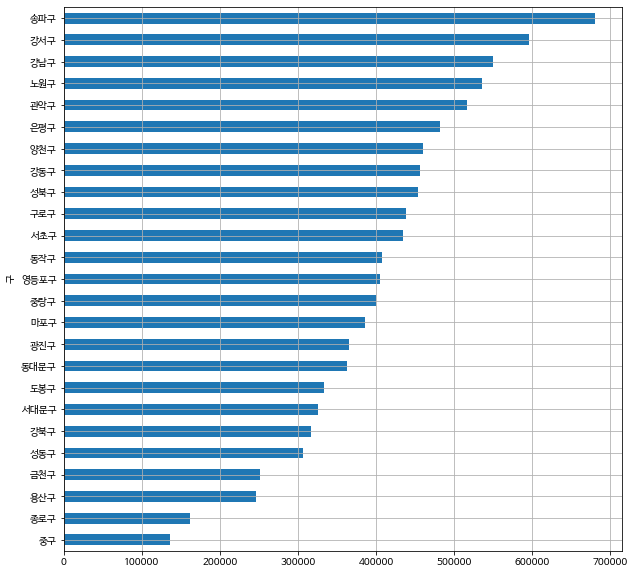

In [38]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/report-3.txt'

pop_seoul = pd.read_csv(filename, sep='\t', header=2, thousands=',')

pop_seoul = pop_seoul[['자치구', '계', '남자', '여자', '계.2', '65세이상고령자']]
pop_seoul.columns = ['구', '전체', '남자', '여자', '외국인', '65세이상']

pop_seoul.drop([0], inplace=True)

pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100

pop_seoul.sort_values(by='고령자비율', ascending=False).head()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

pop_seoul.set_index('구', inplace=True)

pop_seoul['전체'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

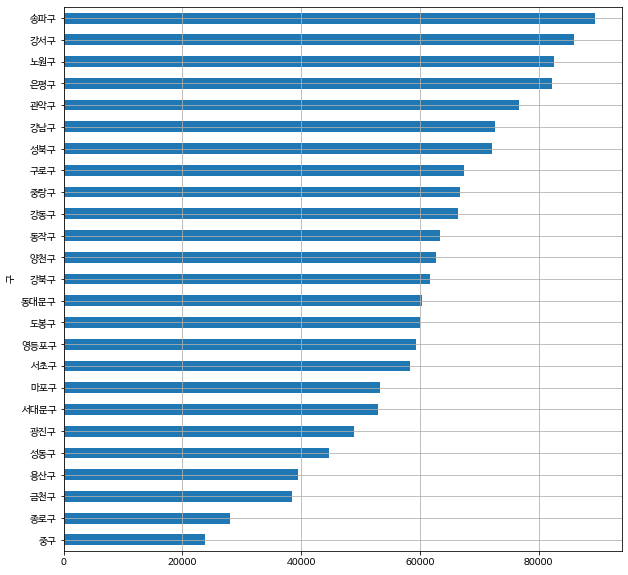

In [42]:
pop_seoul['65세이상'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

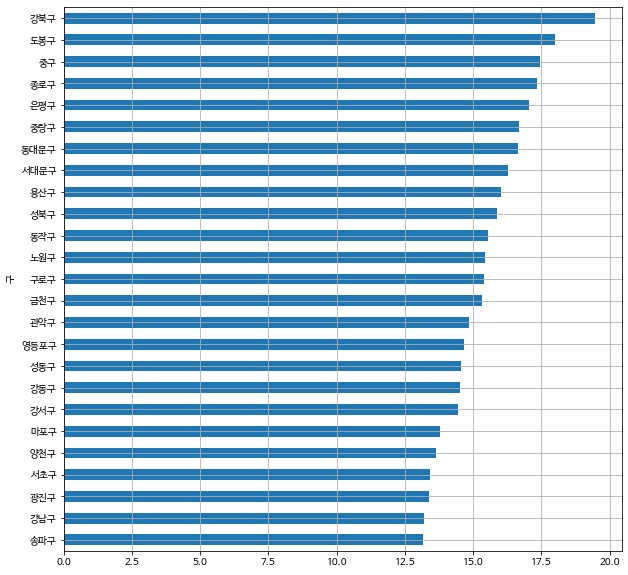

In [43]:
pop_seoul['고령자비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

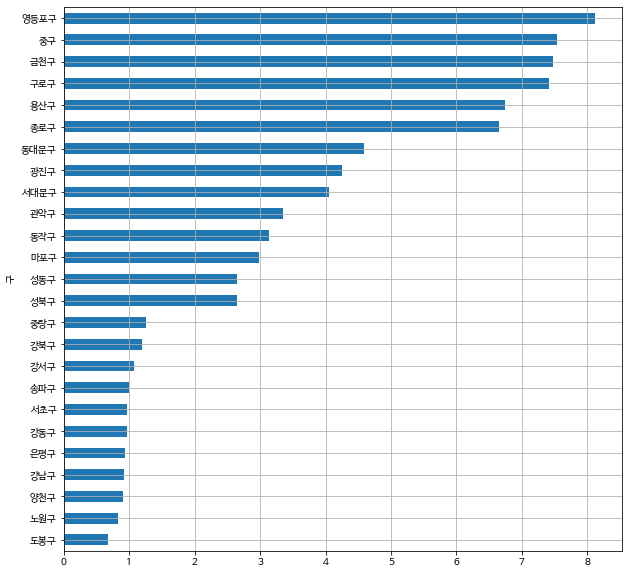

In [44]:
pop_seoul['외국인비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

# Python seaborn heatmap으로 보는 서울시 구별 범죄현황

In [48]:
import pandas as pd

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,4
3,중부,강도,검거,4
4,중부,강간,발생,127


In [50]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station.head()

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    411  496   3   3   2   3   878  2003  1877  2182
강동    155  180  14  15   5   6   907  1650  1873  2161
강북    145  176   2   3   6   6   664  1229  2204  2422
강서    257  306   4   3   9   8  1077  2050  2192  2555
관악    335  408  11  10  10  13  1085  2223  2363  2667

In [51]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [52]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.head()

건수                    
죄종     강간  강도  살인    절도    폭력
발생검거   발생  발생  발생    발생    발생
구분                           
강남    496   3   3  2003  2182
강동    180  15   6  1650  2161
강북    176   3   6  1229  2422
강서    306   3   8  2050  2555
관악    408  10  13  2223  2667

In [56]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns.get_level_values(1)

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object', name='죄종')

In [57]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)
crime_station.head()

죄종,강간,강도,살인,절도,폭력
구분,,,,,
강남,496,3,3,2003,2182
강동,180,15,6,1650,2161
강북,176,3,6,1229,2422
강서,306,3,8,2050,2555
관악,408,10,13,2223,2667


In [59]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

print(tmp_gu, end= '')

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '서초구', '성동구', '성북구', '송파구', '강남구', '양천구', '영등포구', '용산구', '은평구', '종로구', '성북구', '중랑구', '중구', '종로구']

In [61]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu
crime_station.head()

죄종,강간,강도,살인,절도,폭력,구
구분,,,,,,
강남,496,3,3,2003,2182,강남구
강동,180,15,6,1650,2161,강동구
강북,176,3,6,1229,2422,강북구
강서,306,3,8,2050,2555,강서구
관악,408,10,13,2223,2667,관악구


In [63]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu.head()

죄종,강간,강도,살인,절도,폭력
구,,,,,
강남구,666,5,5,2970,3652
강동구,180,15,6,1650,2161
강북구,176,3,6,1229,2422
강서구,306,3,8,2050,2555
관악구,408,10,13,2223,2667


In [65]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu['살인'].sort_values(ascending=False).head()

구
관악구     13
중랑구     10
영등포구    10
구로구     10
강서구      8
Name: 살인, dtype: int64

In [66]:
crime_gu['폭력'].sort_values(ascending=False).head()

구
강남구     3652
영등포구    3039
송파구     2989
관악구     2667
서초구     2636
Name: 폭력, dtype: int64

In [68]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu_norm = crime_gu / crime_gu.max()
crime_gu_norm.head()

죄종,강간,강도,살인,절도,폭력
구,,,,,
강남구,1.000000,0.333333,0.384615,1.000000,1.000000
강동구,0.270270,1.000000,0.461538,0.555556,0.591731
강북구,0.264264,0.200000,0.461538,0.413805,0.663198
강서구,0.459459,0.200000,0.615385,0.690236,0.699617
관악구,0.612613,0.666667,1.000000,0.748485,0.730285


In [69]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu_norm = crime_gu / crime_gu.max()

crime_gu_norm['범죄'] = np.mean(crime_gu_norm, axis=1)
crime_gu_norm.head()

죄종,강간,강도,살인,절도,폭력,범죄
구,,,,,,
강남구,1.000000,0.333333,0.384615,1.000000,1.000000,0.743590
강동구,0.270270,1.000000,0.461538,0.555556,0.591731,0.575819
강북구,0.264264,0.200000,0.461538,0.413805,0.663198,0.400561
강서구,0.459459,0.200000,0.615385,0.690236,0.699617,0.532939
관악구,0.612613,0.666667,1.000000,0.748485,0.730285,0.751610


In [70]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu_norm = crime_gu / crime_gu.max()

crime_gu_norm['범죄'] = np.mean(crime_gu_norm, axis=1)

crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
관악구     0.751610
강남구     0.743590
서초구     0.652463
송파구     0.649392
영등포구    0.629405
Name: 범죄, dtype: float64

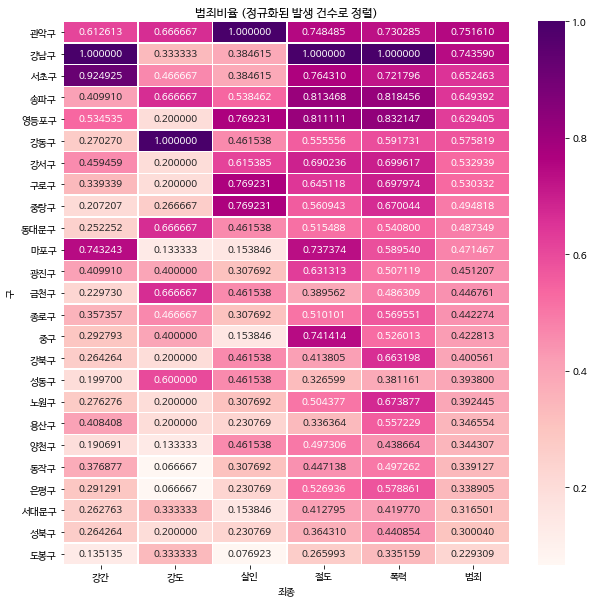

In [71]:
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/DATA/서울_관서별_5대범죄_발생_검거현황.csv'

crime_raw_data = pd.read_csv(filename, encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=np.sum
)

crime_station = crime_station.iloc[:,[1,3,5,7,9]]
crime_station.columns = crime_station.columns.get_level_values(1)

station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

tmp_gu = []
for idx, _ in crime_station.iterrows():
  if idx in station_names :
    tmp_gu.append(gu_names[station_names.index(idx)])
  else : 
    tmp_gu.append(idx + '구')

crime_station['구'] = tmp_gu

crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu_norm = crime_gu / crime_gu.max()

crime_gu_norm['범죄'] = np.mean(crime_gu_norm, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_gu_norm_sort, annot=True, fmt='f', # annot=True : 각 셀에 숫자를 입력 / fmt='f' : 실수 형태로 숫자를 입력 cf) fmt='d': 정수 형태로 숫자를 입력
    linewidths=.5, cmap='RdPu'
)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()